In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("Titanic-Dataset.csv")

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [39]:
df.shape

(891, 12)

In [49]:
df.size

10692

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [43]:
df.duplicated().sum()

0

In [51]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode, inplace=True)


In [ ]:
df.drop(columns=['Cabin'], inplace=True)


In [52]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [53]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN         1           0           1  
1          PC 17599  71.2833   C85         0           0           0  
2  STON/O2. 3101282   7.9250   NaN         0           0           1  
3            113803  53.1000  C123        

In [54]:
df['Sex_male'] = (df['Sex'] == 'male').astype(int)
df['Sex_female'] = (df['Sex'] == 'female').astype(int)
df.drop(columns=['Sex'], inplace=True)
print(df[['Sex_male', 'Sex_female']].head())

   Sex_male  Sex_female
0         1           0
1         0           1
2         0           1
3         0           1
4         1           0


In [55]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [56]:
df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)
df['Embarked_S'] = (df['Embarked'] == 'S').astype(int)
df.drop(columns=['Embarked'], inplace=True)
print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

   Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    int32  
 11  Sex_female   891 non-null    int32  
 12  Embarked_C   891 non-null    int32  
 13  Embarked_Q   891 non-null    int32  
 14  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(5), int64(5), object(3)
memory usage: 87.1+ KB


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [45]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
******************************
male      577
female    314
Name: Sex, dtype: int64
******************************
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
******************************
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            

In [46]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


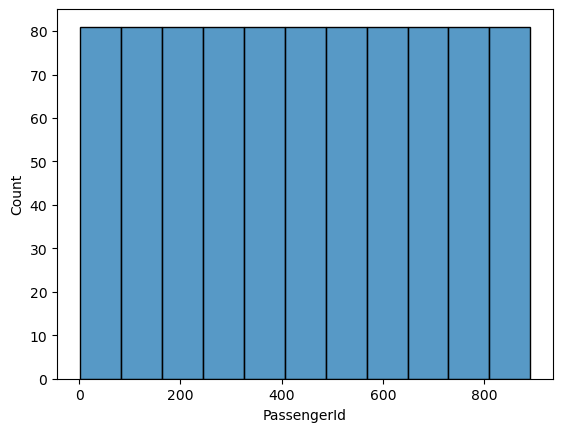

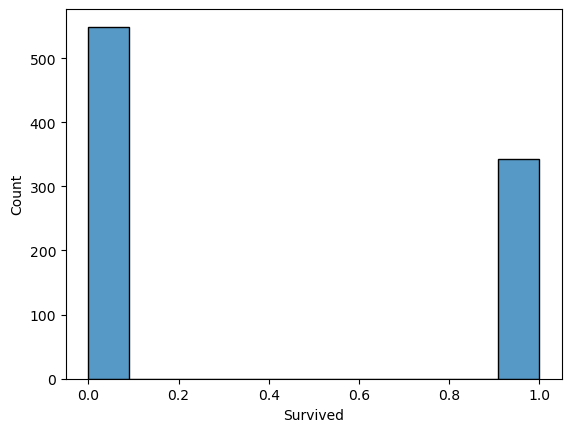

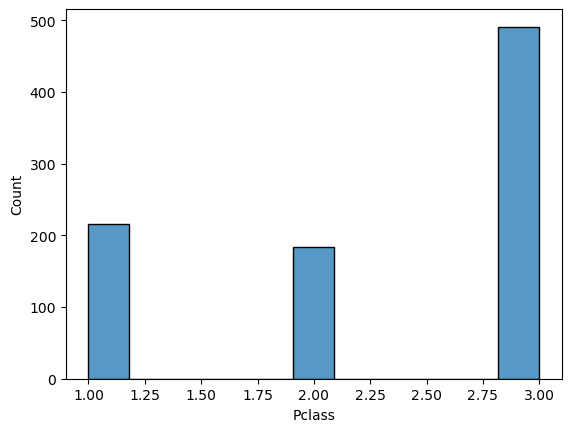

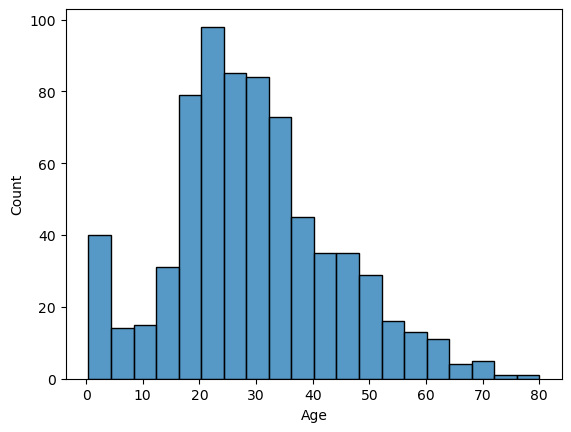

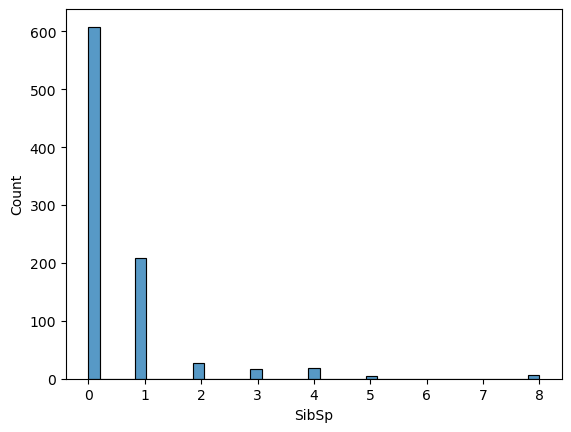

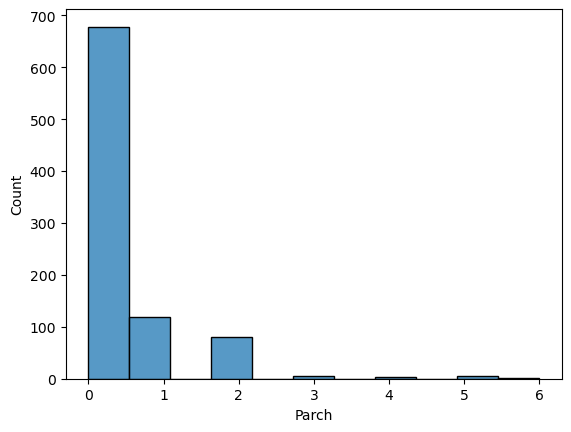

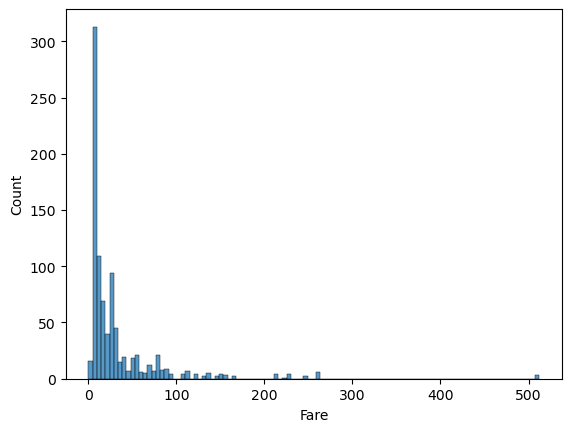

In [47]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

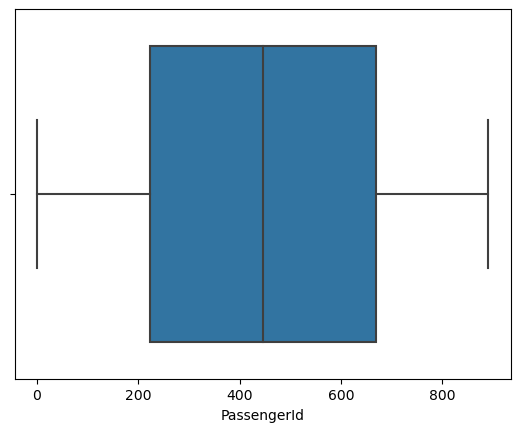

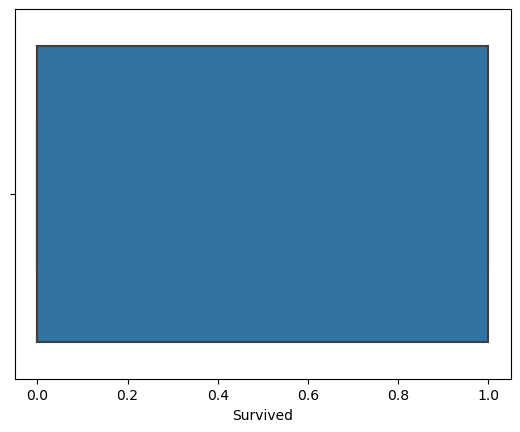

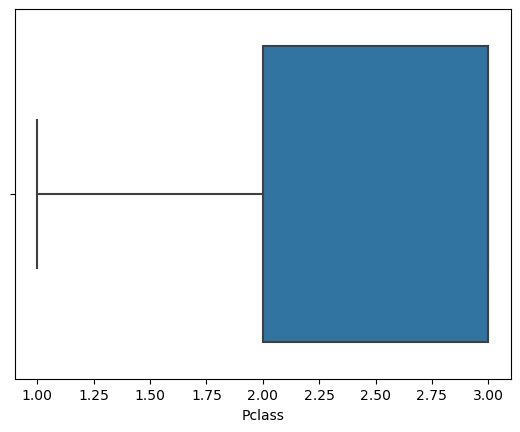

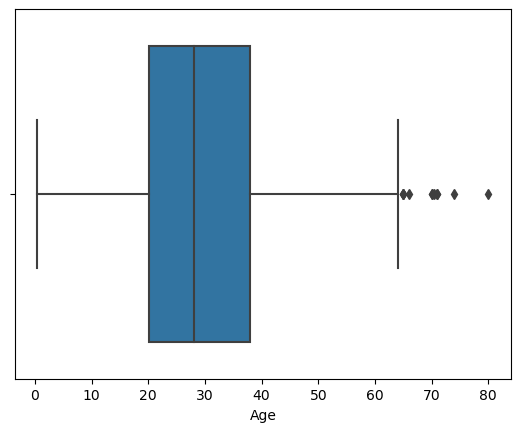

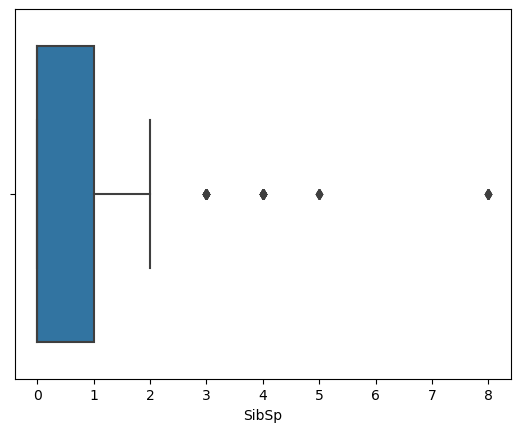

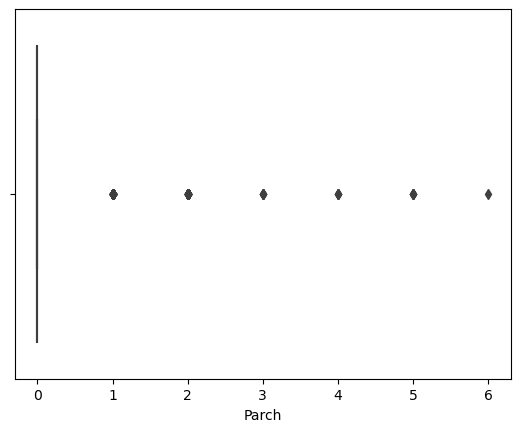

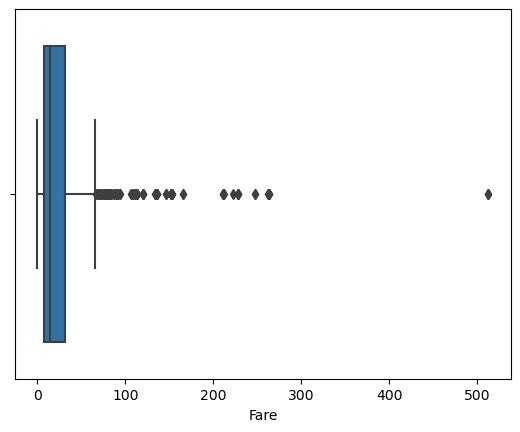

In [48]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

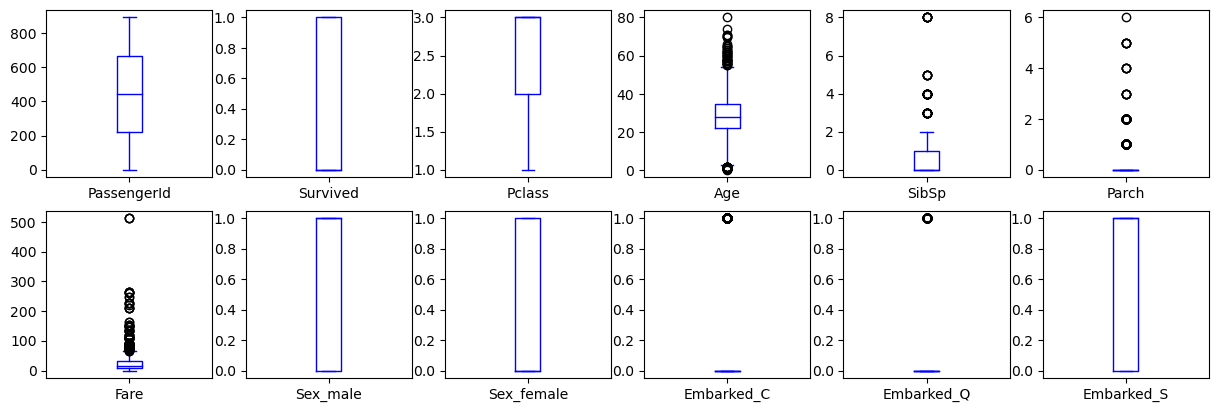

In [59]:
df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']].plot(kind="box", subplots=True, layout=(4, 6), figsize=(15, 10), color="blue")
plt.show()

In [60]:
i=['Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q']
for col in i:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >=lower_bound) & (df[col] <= upper_bound)]
    print(len(df),"\n",lower_bound,"\n",upper_bound)
print("Outliers removed")

825 
 2.5 
 54.5
786 
 -1.5 
 2.5
642 
 0.0 
 0.0
561 
 -19.364500000000003 
 53.2187
485 
 0.0 
 0.0
421 
 0.0 
 0.0
Outliers removed


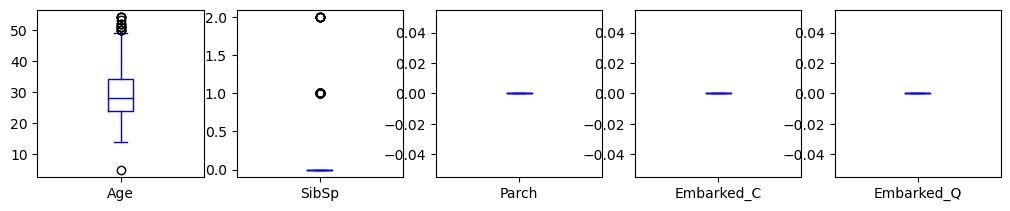

In [61]:
df[['Age', 'SibSp', 'Parch','Embarked_C', 'Embarked_Q',]].plot(kind="box", subplots=True, layout=(4, 6), figsize=(15, 10), color="blue")
plt.show()

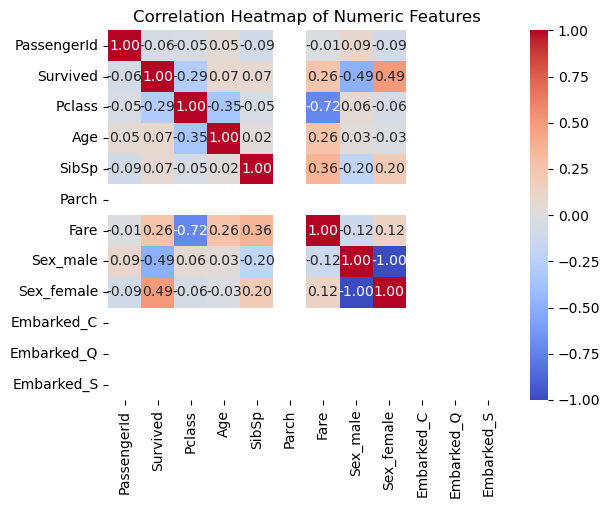

In [62]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']  
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df_standardized[numerical_columns].describe())

                Age          Fare         SibSp  Parch
count  4.210000e+02  4.210000e+02  4.210000e+02  421.0
mean   1.518975e-16  2.320656e-17 -2.953562e-17    0.0
std    1.001190e+00  1.001190e+00  1.001190e+00    0.0
min   -2.751909e+00 -1.259727e+00 -4.262231e-01    0.0
25%   -6.391802e-01 -5.436702e-01 -4.262231e-01    0.0
50%   -1.943953e-01 -4.741395e-01 -4.262231e-01    0.0
75%    4.727821e-01  5.525328e-02 -4.262231e-01    0.0
max    2.696707e+00  3.555820e+00  4.174801e+00    0.0
